In [7]:
from gen_ai_hub.proxy.langchain.init_models import init_llm


model = init_llm("gpt-4o")

model.invoke("Are you there?").content

"Yes, I'm here! How can I assist you today?"

In [4]:
# For the state graph and its parameters
from typing import Annotated
from typing_extensions import TypedDict

# Langgraph imports
from langgraph.graph import START, StateGraph, END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
    message: Annotated[list, add_messages]

In [6]:
graph_builder = StateGraph(state_schema=State)

In [10]:
def chatbot(state: State):
    response = model.invoke(state["message"])
    return {"message": response}


In [11]:
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [12]:
graph = graph_builder.compile()

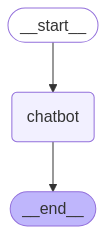

In [13]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [18]:
graph.invoke({"message": "JAI SHREE RAM"})["message"][1].content

'Jai Shree Ram! How can I assist you today?'